##  🌳 **Árboles de decisión** 🌳

---

### Introducción:
En este notebook entrenaremos un modelo básico de Árbol de Decisión para clasificación utilizando el conjunto de datos "Wine" provisto por scikit-learn. Evaluaremos su desempeño e interpretaremos sus resultados.

---
### Objetivo

Predecir los diferentes tipos de vino (variedades de uva o cultivar) de  acuerdo a sus características.

`Clase 0`: Vino proveniente del primer cultivar.

`Clase 1`: Vino proveniente del segundo cultivar.

`Clase 2`: Vino proveniente del tercer cultivar.

---

### 1. Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configuración estética
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

---

### 2. Cargar datos

In [2]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

---

### 3. Exploración de datos

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


C:\Users\arhui\AppData\Local\Temp\ipykernel_4736\2760956243.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


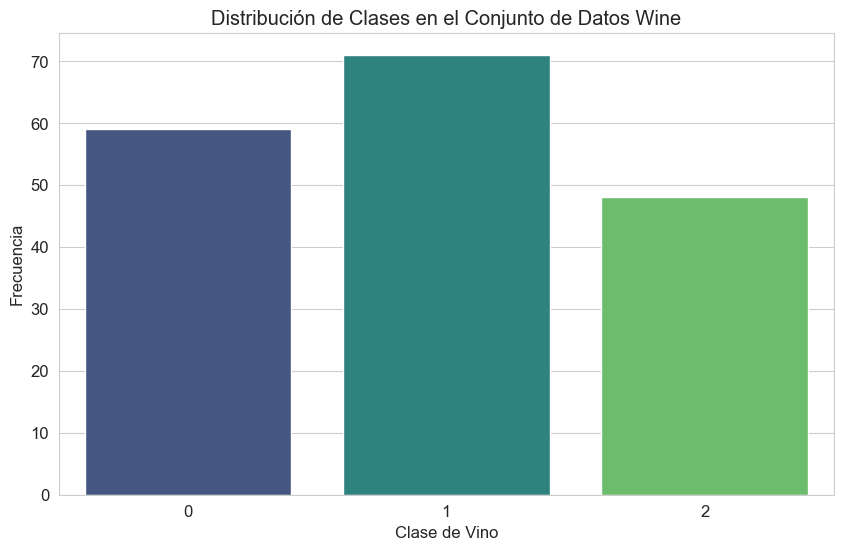

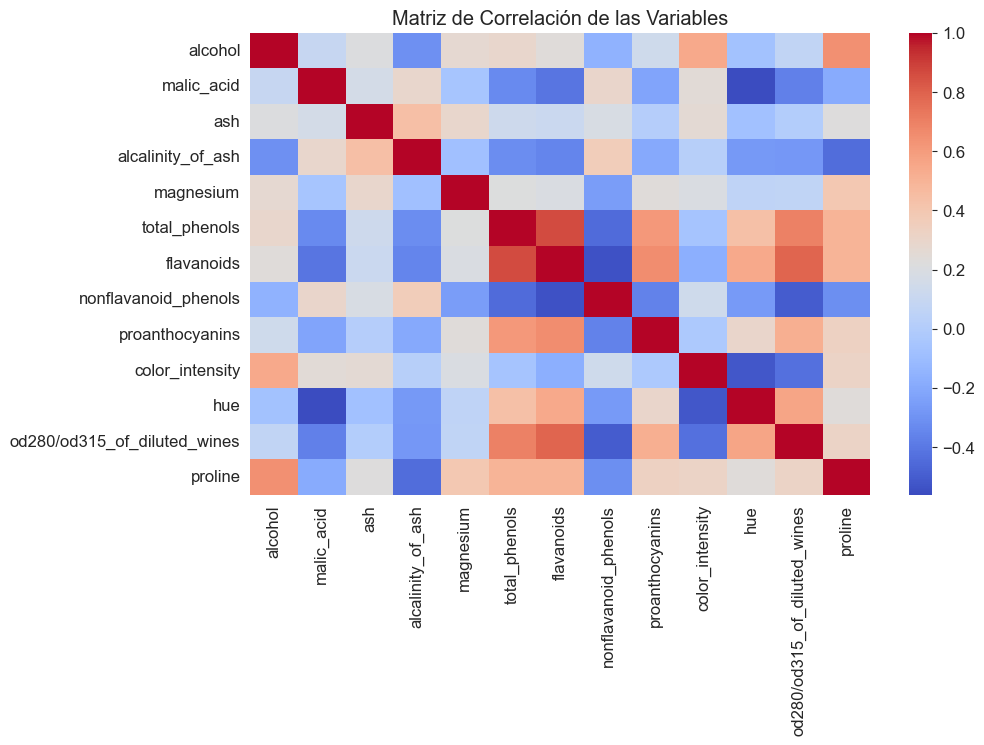

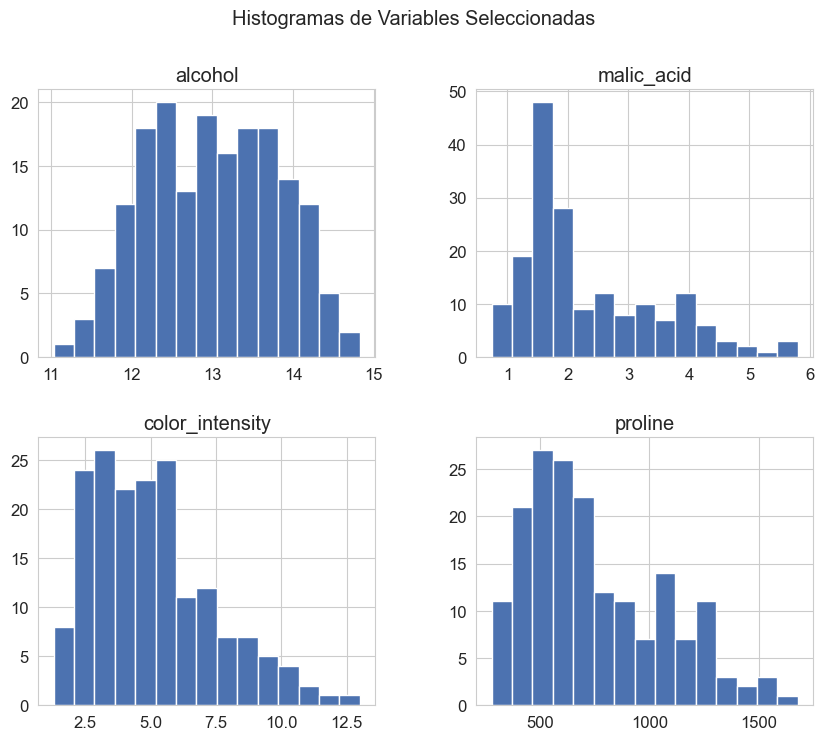

In [3]:
# Veamos las primeras filas de los datos
display(X.head())

# Estadísticas descriptivas
display(X.describe())

# Revisemos la distribución de la variable objetivo
sns.countplot(x=y, palette="viridis")
plt.title("Distribución de Clases en el Conjunto de Datos Wine")
plt.xlabel("Clase de Vino")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación entre variables
corr = X.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Matriz de Correlación de las Variables")
plt.show()

# Podemos visualizar la distribución de algunas variables clave
features_to_plot = ["alcohol", "malic_acid", "color_intensity", "proline"]
X[features_to_plot].hist(bins=15, figsize=(10,8), layout=(2,2), color="#4C72B0")
plt.suptitle("Histogramas de Variables Seleccionadas")
plt.show()

---

### 4. División de datos

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

---

### 5. Entrenamiento del modelo

In [7]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

param_grid = {
    "max_depth": [None, 3, 5, 7],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print("Mejores parámetros encontrados:", grid_search.best_params_)


Mejores parámetros encontrados: {'max_depth': None, 'min_samples_split': 10}


---

### 6. Evaluación del modelo

Exactitud (Árbol por defecto): 0.9629629629629629
Exactitud (Árbol optimizado): 0.9629629629629629
Matriz de Confusión (Mejor modelo):
 [[17  1  0]
 [ 0 21  0]
 [ 0  1 14]]
Reporte de Clasificación (Mejor modelo):
               precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



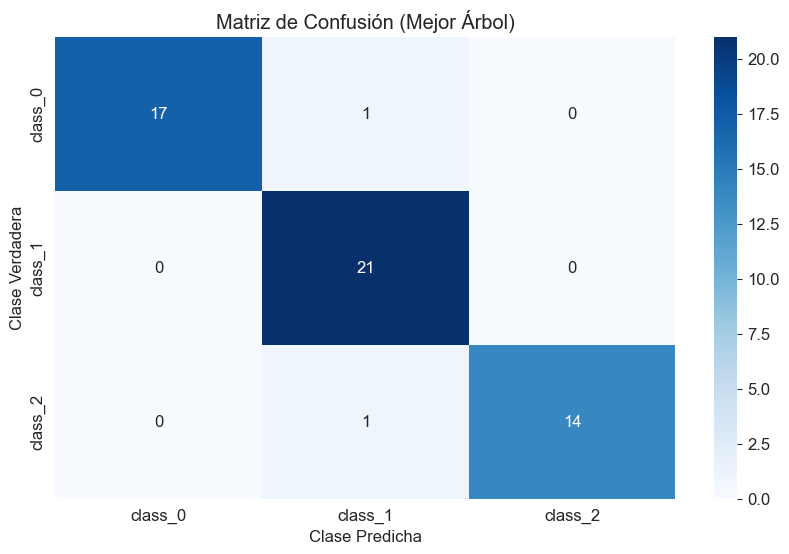

In [8]:
y_pred_simple = tree.predict(X_test)
y_pred_best = best_tree.predict(X_test)

accuracy_simple = accuracy_score(y_test, y_pred_simple)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("Exactitud (Árbol por defecto):", accuracy_simple)
print("Exactitud (Árbol optimizado):", accuracy_best)

# Matriz de Confusión y Reporte de Clasificación del mejor modelo
cm = confusion_matrix(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best, target_names=data.target_names)

print("Matriz de Confusión (Mejor modelo):\n", cm)
print("Reporte de Clasificación (Mejor modelo):\n", report)

# Visualicemos la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Matriz de Confusión (Mejor Árbol)")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Verdadera")
plt.show()

---

### 7. Visualizaicón del árbol de decisión

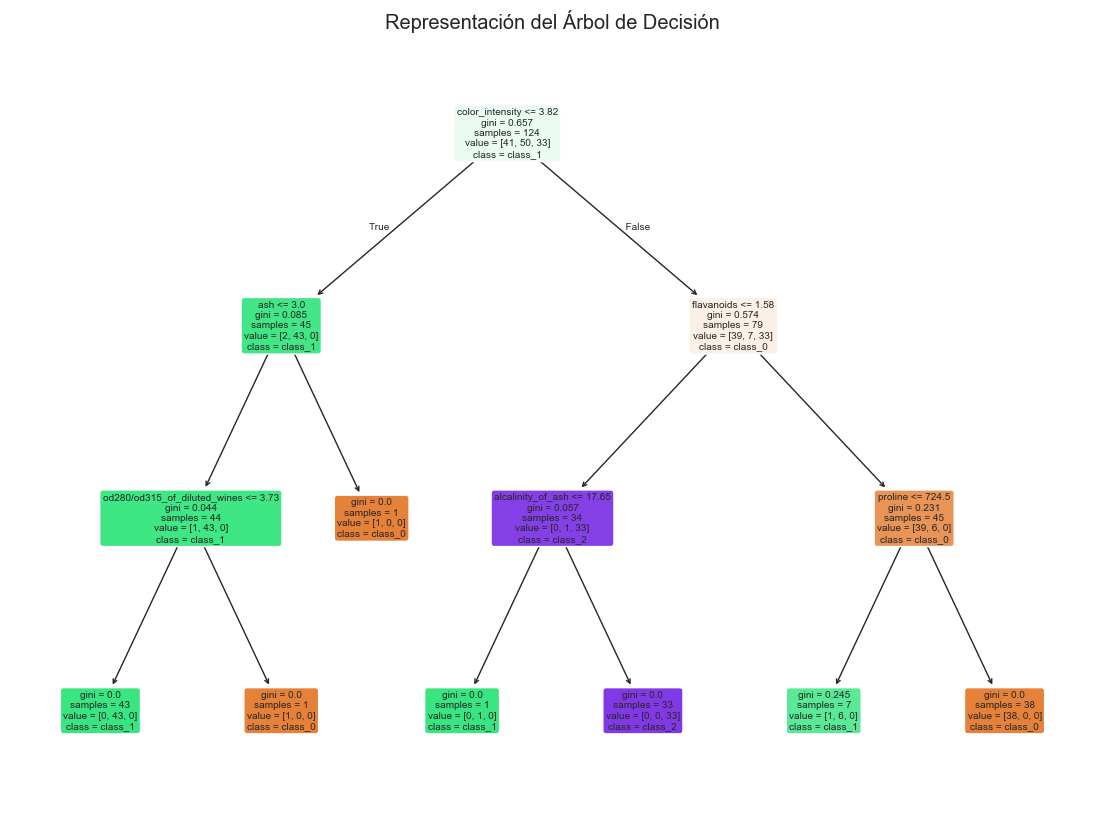

In [9]:
plt.figure(figsize=(14,10))
plot_tree(best_tree, feature_names=X.columns, class_names=data.target_names, filled=True, rounded=True)
plt.title("Representación del Árbol de Decisión")
plt.show()